<a href="https://colab.research.google.com/github/vincentjunitio00/Flower-Classification-from-scratch/blob/main/%5BCNN%5D_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone "https://github.com/vincentjunitio00/Flower-Classification-from-scratch"

Cloning into 'Flower-Classification-from-scratch'...
remote: Enumerating objects: 2582, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 2582 (delta 1), reused 22 (delta 0), pack-reused 2559
Receiving objects: 100% (2582/2582), 133.13 MiB | 34.19 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
import os
import shutil
import random
from sklearn.preprocessing import OneHotEncoder

In [3]:
home = '/content/Flower-Classification-from-scratch/'

training_path = os.path.join(home, 'training/')
testing_path = os.path.join(home, 'testing/')

dataset = os.path.join(home,'flowers_full')
testing_random = os.path.join(home,'testing_random')
training_random = os.path.join(home,'training_random')

try:
  os.mkdir(testing_random)
  os.mkdir(training_random)
except:
  shutil.rmtree(testing_random)
  shutil.rmtree(training_random)
  os.mkdir(testing_random)
  os.mkdir(training_random)
labels = os.listdir(dataset)

In [4]:
def split_data():  
  '''
  Function to split dataset into 80% training set and 20% test set
  each dataset is chosen randomly

  Parameters:
    None
  
  Returns:
    None

  '''
  for label in labels:
    curr_dir = os.path.join(dataset,label)
    dest_training_dir = os.path.join(training_random,label)
    dest_testing_dir = os.path.join(testing_random,label)
    try:
      os.mkdir(dest_training_dir)
      os.mkdir(dest_testing_dir)
    except:
      shutil.rmtree(dest_training_dir)
      shutil.rmtree(dest_testing_dir)
      os.mkdir(dest_training_dir)
      os.mkdir(dest_testing_dir)

    files = os.listdir(curr_dir)
    rand_num_training_set = []
    while len(rand_num_training_set) < 80:
      rand_num = random.randint(0,len(files)-1)
      if(rand_num not in rand_num_training_set):
        curr_files = os.path.join(curr_dir,files[rand_num])
        rand_num_training_set.append(rand_num)
        shutil.copyfile(curr_files,dest_training_dir+'/'+files[rand_num])

    rand_num_testing_set = []
    while len(rand_num_testing_set) < 20:
      rand_num = random.randint(0,len(files)-1)
      if(rand_num not in rand_num_training_set):
        rand_num_testing_set.append(rand_num)
        curr_files = os.path.join(curr_dir,files[rand_num])

        shutil.copyfile(curr_files,dest_testing_dir+'/'+files[rand_num])
split_data()

In [5]:
def create_processed_folder(labels):
  '''
  Function to create folder which contains dataset used for training
  and testing

  Parameters:
    labels (list) : list of labels in dataset

  Returns:
    path (dict) : dictionary of processed directory path
  '''
  content = '/content/'
  processed_path = os.path.join(content, 'processed/')
  os.mkdir(processed_path)

  processed_training_path = os.path.join(processed_path, 'training/')
  os.mkdir(processed_training_path)

  processed_testing_path = os.path.join(processed_path, 'testing/')
  os.mkdir(processed_testing_path)

  path = {}
  
  for label in labels:
    training_name = str(label)+'_processed_training_path'
    training_name_path = os.path.join(processed_training_path, str(label)+'/')
    os.mkdir(training_name_path)

    testing_name = str(label)+'_processed_testing_path'
    testing_name_path = os.path.join(processed_testing_path, str(label)+'/')
    os.mkdir(testing_name_path)

    path[training_name] = training_name_path
    path[testing_name] = testing_name_path

  path["training_path"] = processed_training_path
  path["testing_path"] = processed_testing_path

  print("Warning! You can only run this function once in the same runtime!")
  return path

In [6]:
processed_path = create_processed_folder(labels)

Warning! You can only run this function once in the same runtime!


In [7]:
processed_path

{'daisy_processed_testing_path': '/content/processed/testing/daisy/',
 'daisy_processed_training_path': '/content/processed/training/daisy/',
 'dandelion_processed_testing_path': '/content/processed/testing/dandelion/',
 'dandelion_processed_training_path': '/content/processed/training/dandelion/',
 'sunflower_processed_testing_path': '/content/processed/testing/sunflower/',
 'sunflower_processed_training_path': '/content/processed/training/sunflower/',
 'testing_path': '/content/processed/testing/',
 'training_path': '/content/processed/training/'}

In [8]:
def preprocess_images(set_name, set_path, processed_path):

  '''
  Function to preprocess dataset
  1. convert images to grayscale
  2. create one hot encoding for each dataset based on its label
  
  Parameters:
    set_name (string) : define what set this preprocess for, either training or testing
    set_path (string) : define where to get the dataset
    processed_path (string) : define where to put preprocessed images
  
  Returns:
    X_set (list) : list of images (matrix 2 dimension representation)
    y_set (list) : list of label of each image (one hot encoding representation)
  '''
  X_set = []
  y_set = []

  labels = os.listdir(set_path)
  for label in labels:
    directory_now = os.path.join(set_path, str(label)+'/')
    files = os.listdir(directory_now)

    pointer = 1
    for file in files:
      file_path = os.path.join(directory_now, file)
      img = cv2.imread(file_path)
      img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      img_resized = cv2.resize(img_gray, (320, 240))
      img_final = img_resized.astype(np.float64)

      img_numpy = img_final / 255.
      X_set.append(img_numpy)
      y_set.append(np.array([label]))

      file_name = str(label)+"_processed_"+str(pointer)+'.jpg'
      file_name_path = os.path.join(processed_path[str(label)+"_processed_"+str(set_name)+"_path"],file_name)
      cv2.imwrite(file_name_path, img_final)
      pointer += 1
  
  X_set = np.array(X_set)

  ohe = OneHotEncoder()
  y_set = ohe.fit_transform(np.array(y_set)).toarray()
  
  return X_set, y_set

In [9]:
X_train, y_train = preprocess_images('training', training_random, processed_path)

In [10]:
X_train = np.expand_dims(X_train, axis=-1)

In [11]:
X_test, y_test = preprocess_images('testing', testing_random, processed_path)

In [12]:
X_test = np.expand_dims(X_test, axis=-1)

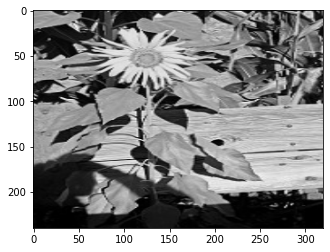

In [13]:
def visualize_images(X):
  plt.imshow(X.reshape((240, 320)), cmap='gray')

visualize_images(X_test[0])

In [14]:
np.random.seed(0)

In [15]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from keras import regularizers
from keras.optimizers import Adam

Epoch 1/50
8/8 [==============================] - 54s 440ms/step - loss: 249.8685 - accuracy: 0.3244 - val_loss: 101.3712 - val_accuracy: 0.3333
Epoch 2/50
8/8 [==============================] - 2s 266ms/step - loss: 106.7270 - accuracy: 0.3658 - val_loss: 74.0144 - val_accuracy: 0.3333
Epoch 3/50
8/8 [==============================] - 2s 266ms/step - loss: 84.6683 - accuracy: 0.4138 - val_loss: 50.4355 - val_accuracy: 0.3667
Epoch 4/50
8/8 [==============================] - 2s 269ms/step - loss: 33.8714 - accuracy: 0.5061 - val_loss: 10.1596 - val_accuracy: 0.5333
Epoch 5/50
8/8 [==============================] - 2s 267ms/step - loss: 9.4763 - accuracy: 0.6678 - val_loss: 14.3112 - val_accuracy: 0.5167
Epoch 6/50
8/8 [==============================] - 2s 268ms/step - loss: 9.5094 - accuracy: 0.6307 - val_loss: 17.2657 - val_accuracy: 0.3833
Epoch 7/50
8/8 [==============================] - 2s 268ms/step - loss: 9.5648 - accuracy: 0.6400 - val_loss: 12.9193 - val_accuracy: 0.5333
Epoch

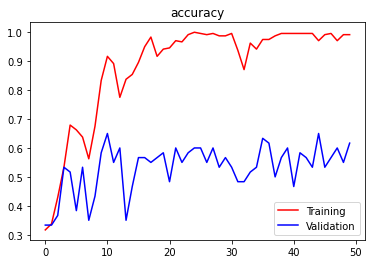

<Figure size 432x288 with 0 Axes>

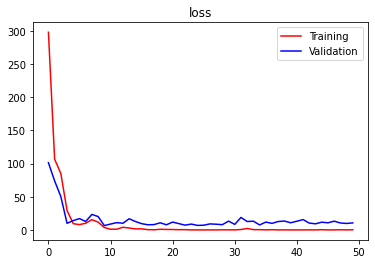

<Figure size 432x288 with 0 Axes>

In [16]:
model = Sequential([
                    Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(1e-3)),
                    MaxPooling2D((2, 2)),
                    Flatten(),
                    Dense(256, activation='relu'),
                    Dense(256, activation='relu'),
                    Dense(256, activation='relu'),
                    Dense(3, activation='softmax'),
])

model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs = 50, verbose = 1, validation_data=(X_test, y_test))

def plot_graph(epochs, string, history):
  plt.plot(epochs, history.history[string], 'r', label='Training')
  plt.plot(epochs, history.history['val_'+string], 'b', label='Validation')
  plt.title(string)
  plt.legend(loc=0)
  plt.figure()
  plt.show()

epochs = range(50)

plot_graph(epochs, 'accuracy', history)
plot_graph(epochs, 'loss', history)

Epoch 1/50
8/8 [==============================] - 53s 405ms/step - loss: 3051243.1812 - accuracy: 0.3776 - val_loss: 586.3788 - val_accuracy: 0.3500
Epoch 2/50
8/8 [==============================] - 2s 261ms/step - loss: 353.5593 - accuracy: 0.3715 - val_loss: 1.8233 - val_accuracy: 0.3333
Epoch 3/50
8/8 [==============================] - 2s 262ms/step - loss: 1.8651 - accuracy: 0.3017 - val_loss: 2.1769 - val_accuracy: 0.3333
Epoch 4/50
8/8 [==============================] - 2s 264ms/step - loss: 2.1170 - accuracy: 0.3164 - val_loss: 1.7156 - val_accuracy: 0.3333
Epoch 5/50
8/8 [==============================] - 2s 262ms/step - loss: 1.7728 - accuracy: 0.3129 - val_loss: 2.5284 - val_accuracy: 0.3333
Epoch 6/50
8/8 [==============================] - 2s 261ms/step - loss: 2.3236 - accuracy: 0.3085 - val_loss: 2.2074 - val_accuracy: 0.3333
Epoch 7/50
8/8 [==============================] - 2s 261ms/step - loss: 2.0332 - accuracy: 0.3185 - val_loss: 1.8032 - val_accuracy: 0.3333
Epoch 8/5

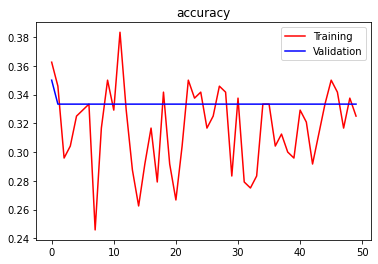

<Figure size 432x288 with 0 Axes>

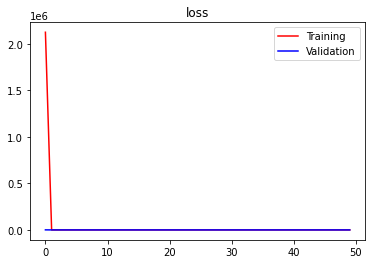

<Figure size 432x288 with 0 Axes>

In [16]:
model = Sequential([
                    Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(1e-3)),
                    MaxPooling2D((2, 2)),
                    Flatten(),
                    Dense(256, activation='relu'),
                    Dense(256, activation='relu'),
                    Dense(256, activation='relu'),
                    Dense(3, activation='softmax'),
])

model.compile(optimizer = Adam(learning_rate=0.1), loss='categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs = 50, verbose = 1, validation_data=(X_test, y_test))

def plot_graph(epochs, string, history):
  plt.plot(epochs, history.history[string], 'r', label='Training')
  plt.plot(epochs, history.history['val_'+string], 'b', label='Validation')
  plt.title(string)
  plt.legend(loc=0)
  plt.figure()
  plt.show()

epochs = range(50)

plot_graph(epochs, 'accuracy', history)
plot_graph(epochs, 'loss', history)

Epoch 1/50
8/8 [==============================] - 53s 421ms/step - loss: 10633894513.9257 - accuracy: 0.3814 - val_loss: 435177760.0000 - val_accuracy: 0.4000
Epoch 2/50
8/8 [==============================] - 2s 260ms/step - loss: 649207729.7778 - accuracy: 0.3489 - val_loss: 541.3205 - val_accuracy: 0.3333
Epoch 3/50
8/8 [==============================] - 2s 260ms/step - loss: 1948.3693 - accuracy: 0.3327 - val_loss: 3072.8098 - val_accuracy: 0.3333
Epoch 4/50
8/8 [==============================] - 2s 261ms/step - loss: 1554.7960 - accuracy: 0.3835 - val_loss: 63.0378 - val_accuracy: 0.3333
Epoch 5/50
8/8 [==============================] - 2s 261ms/step - loss: 184.9674 - accuracy: 0.3539 - val_loss: 33.3274 - val_accuracy: 0.3333
Epoch 6/50
8/8 [==============================] - 2s 261ms/step - loss: 32.5835 - accuracy: 0.3381 - val_loss: 28.2184 - val_accuracy: 0.3333
Epoch 7/50
8/8 [==============================] - 2s 260ms/step - loss: 29.2291 - accuracy: 0.3001 - val_loss: 26.10

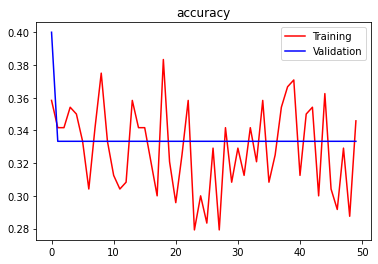

<Figure size 432x288 with 0 Axes>

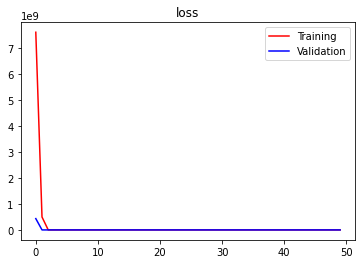

<Figure size 432x288 with 0 Axes>

In [16]:
model = Sequential([
                    Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(1e-3)),
                    MaxPooling2D((2, 2)),
                    Flatten(),
                    Dense(256, activation='relu'),
                    Dense(256, activation='relu'),
                    Dense(256, activation='relu'),
                    Dense(3, activation='softmax'),
])

model.compile(optimizer = Adam(learning_rate=0.8), loss='categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs = 50, verbose = 1, validation_data=(X_test, y_test))

def plot_graph(epochs, string, history):
  plt.plot(epochs, history.history[string], 'r', label='Training')
  plt.plot(epochs, history.history['val_'+string], 'b', label='Validation')
  plt.title(string)
  plt.legend(loc=0)
  plt.figure()
  plt.show()

epochs = range(50)

plot_graph(epochs, 'accuracy', history)
plot_graph(epochs, 'loss', history)